# Basic Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Project description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Dataset Link :-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

# Import The Dataset And Create The DataFrame

In [136]:
df = pd.read_csv(r'E:\Flip Robo\dataset\Temperature Forecast Project.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# Basic Data Exploration

In this operation, we will perform below operations to check the dataset.

Head, tail, sample of the datset                                                                                  
The shape of the dataset                                                                        
Info of the dataset                                                                 
summary of the dataset

In [137]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [138]:
df.tail()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.6450,127.135,212.3350,5.178230,5992.895996,38.9,29.8


In [139]:
df.sample(5)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
4279,5.0,16-08-2015,30.6,21.1,35.878864,92.249657,31.855654,20.781550,5.635796,150.379559,...,0.0,0.000000,0.0,37.5507,127.135,35.0380,0.5055,4958.898438,32.6,20.4
5283,9.0,25-07-2016,32.1,25.7,62.648727,92.557358,30.258781,25.676076,8.542330,100.124988,...,0.0,0.000000,0.0,37.4967,126.826,50.9312,0.4125,5545.968750,32.5,24.8
2823,24.0,19-08-2014,25.3,20.3,53.098980,88.314713,28.838707,22.714764,4.491992,35.357061,...,0.0,0.000000,0.0,37.5237,126.909,17.2956,0.2223,4849.283203,28.9,22.9
5778,4.0,14-08-2016,30.4,27.5,60.882450,99.443169,31.873431,24.432989,6.103789,115.329602,...,0.0,1.537303,0.0,37.6450,127.022,45.7160,2.5348,4992.892090,34.4,25.7
4358,9.0,19-08-2015,29.8,24.3,61.474949,86.186882,27.468614,23.882078,5.574608,62.905655,...,0.0,0.000000,0.0,37.4967,126.826,50.9312,0.4125,4881.014648,28.4,24.0


# Shape of the dataset

In [140]:
df.shape

(7752, 25)

In [141]:
print("Number of Rows :",df.shape[0])
print("Number of Columns :",df.shape[1])

Number of Rows : 7752
Number of Columns : 25


The Shape attribute tell us how many rows and columns are present into the dataset. It is used to check the dimension of data.

# Information of the dataset.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


The Info attribute tell us brief about the dataset which includes indexing type, column type, null values and memory usage.

# Summary of the dataset

In [143]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


<AxesSubplot:>

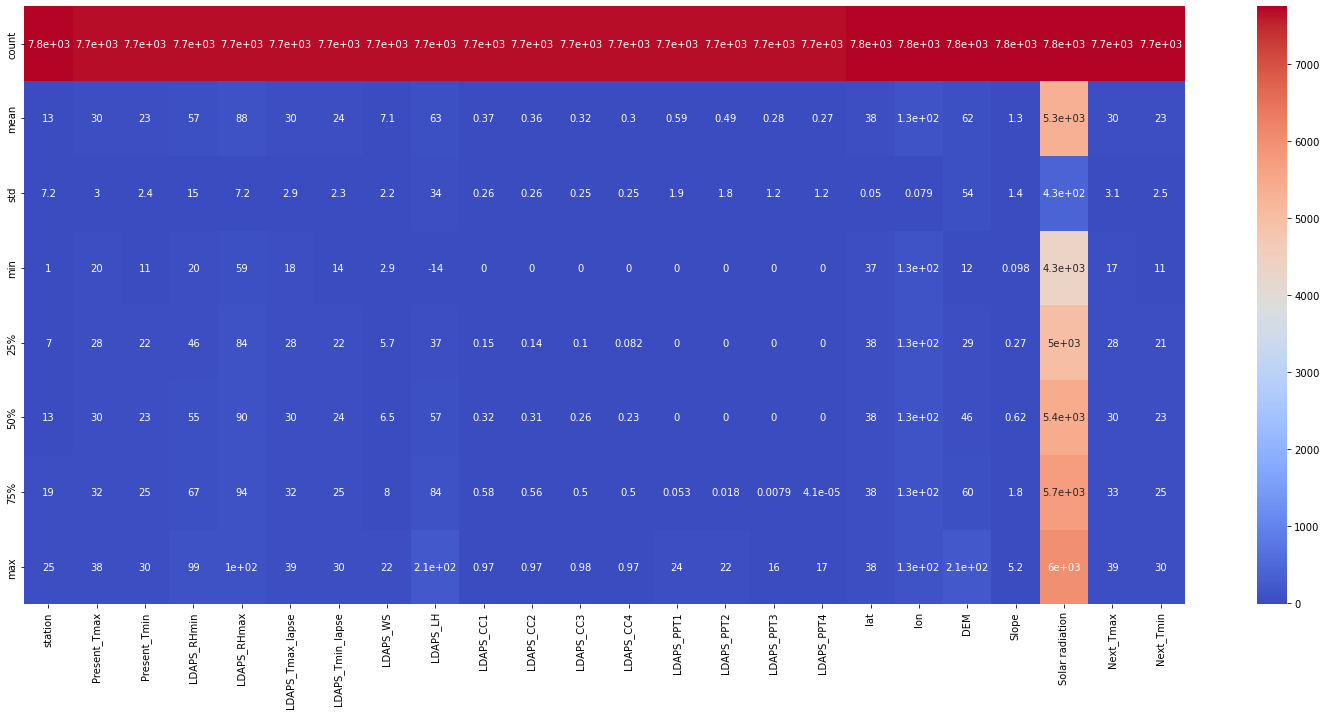

In [144]:
plt.figure(figsize=(26,11))
sns.heatmap(df.describe(),annot=True,cmap='coolwarm')

# Data Visualization

# Univerate Analysis

When we are doing any analysis with single column that is called Univerate Analysis

<AxesSubplot:xlabel='Present_Tmax', ylabel='Count'>

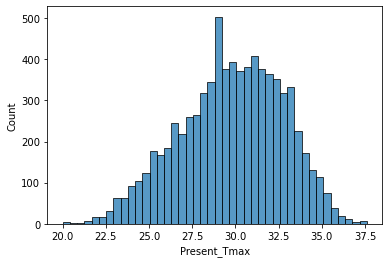

In [145]:
sns.histplot(df['Present_Tmax'])

here, we can see Maximum air temperature goes high when Present_Tmax (temperature maximum) between 28 to 33.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Count'>

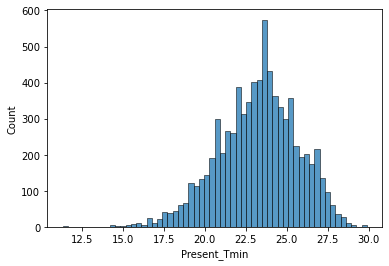

In [146]:
sns.histplot(df['Present_Tmin'])

Here, we can see Minimum air Temperature goes high when Present_Tmin (temperature minimum) between 22 to 25.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Count'>

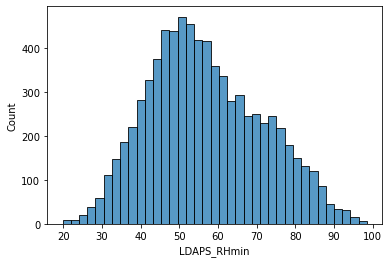

In [147]:
sns.histplot(df['LDAPS_RHmin'])

here, we can see the next day minimum relative humidity maximum lies between 45 to 60.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Count'>

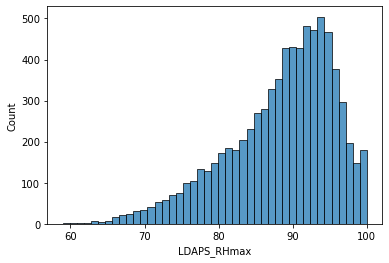

In [148]:
sns.histplot(df['LDAPS_RHmax'])

here, we can see the next day maximum relative humidity maximum lies between 90 to 98.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Count'>

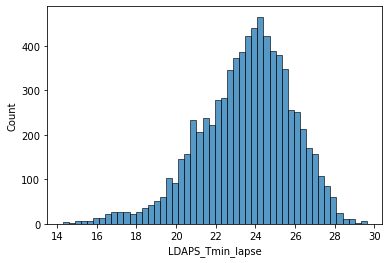

In [149]:
sns.histplot(df['LDAPS_Tmin_lapse'])

here, we can see next day maximum air temperature maximum lies between 23 to 26.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Count'>

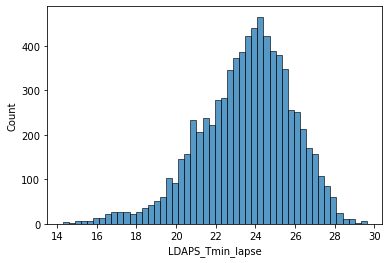

In [150]:
sns.histplot(df['LDAPS_Tmin_lapse'])

here, we can see next day minimum air temperature maximum lies between 23 to 25

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Count'>

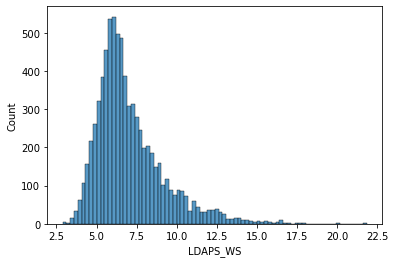

In [29]:
sns.histplot(df['LDAPS_WS'])

here, we can see next day average wind speed high when LDAPS_WS range is 5 to 7.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Count'>

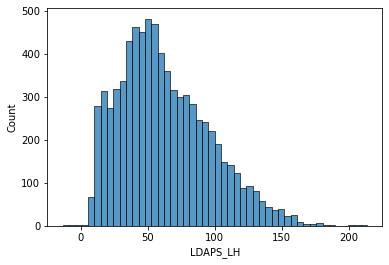

In [30]:
sns.histplot(df['LDAPS_LH'])

here, we can see next day average latent heat flux high when it's range between 48 to 70

<AxesSubplot:xlabel='lat', ylabel='Count'>

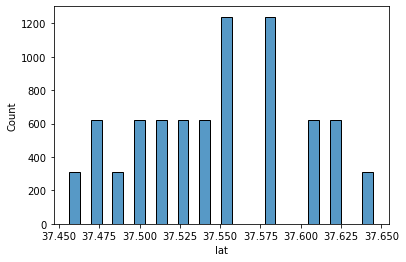

In [33]:
sns.histplot(df['lat'])

the lat value high at 37.550

<AxesSubplot:xlabel='lon', ylabel='Count'>

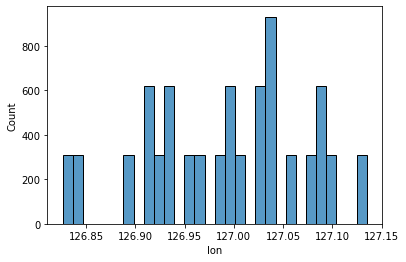

In [34]:
sns.histplot(df['lon'])

The lon value high at 127.05

<AxesSubplot:xlabel='DEM', ylabel='Count'>

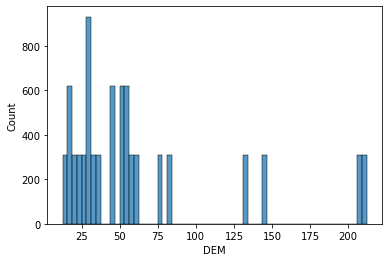

In [35]:
sns.histplot(df['DEM'])

Here, we can see in when DEM value is arround 30 that time this is high

<AxesSubplot:xlabel='Slope', ylabel='Count'>

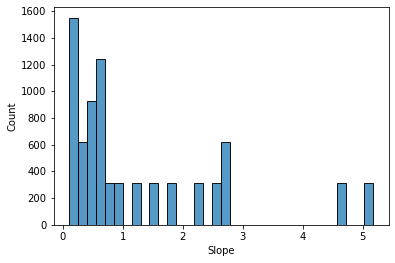

In [36]:
sns.histplot(df['Slope'])

here the slope is high when value lies between 0 to 1.

<AxesSubplot:xlabel='Solar radiation', ylabel='Count'>

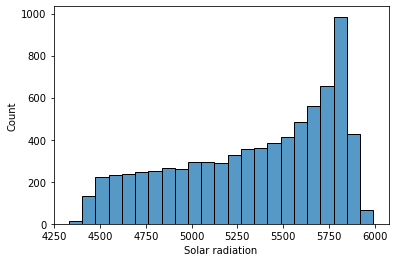

In [37]:
sns.histplot(df['Solar radiation'])

here, we can see daily comes Solar Radiation is high when it's value lies between 5750 to 5800.

<AxesSubplot:xlabel='Next_Tmax', ylabel='Count'>

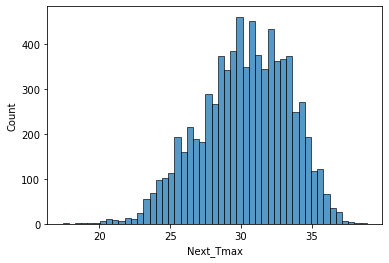

In [38]:
sns.histplot(df['Next_Tmax'])

here, we can see next day maximum air temperature high when it's value lies between 28 to 34.

<AxesSubplot:xlabel='Next_Tmin', ylabel='Count'>

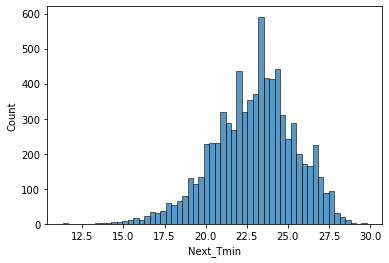

In [39]:
sns.histplot(df['Next_Tmin'])

here, we can see next day minimum air temperature high when it's value lies between 22 to 25

In [44]:
df.columns.to_list()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [151]:
df.drop(['station','Date','LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',],axis=1,inplace=True)

# Handling Missing Value

In [152]:
df.isnull().sum()

Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [153]:
df['Present_Tmax'].dtype

dtype('float64')

In [154]:
medi = df['Present_Tmax'].median()
medi

29.9

In [155]:
df['Present_Tmax'].fillna(medi,inplace=True)

In [156]:
df['Present_Tmin'].dtype

dtype('float64')

In [157]:
medi = df['Present_Tmin'].median()
medi

23.4

In [158]:
df['Present_Tmin'].fillna(medi,inplace=True)

In [159]:
df['LDAPS_RHmin'].dtype

dtype('float64')

In [160]:
medi = df['LDAPS_RHmin'].median()
medi

55.03902435

In [161]:
df['LDAPS_RHmin'].fillna(medi,inplace=True)

In [162]:
df['LDAPS_RHmax'].dtype

dtype('float64')

In [163]:
medi = df['LDAPS_RHmax'].median()
medi

89.79347992

In [164]:
df['LDAPS_RHmax'].fillna(medi,inplace=True)

In [165]:
df['LDAPS_Tmax_lapse'].dtype

dtype('float64')

In [166]:
medi = df['LDAPS_Tmax_lapse'].median()
medi

29.70342642

In [167]:
df['LDAPS_Tmax_lapse'].fillna(medi,inplace=True)

In [168]:
df['LDAPS_Tmin_lapse'].dtype

dtype('float64')

In [169]:
medi = df['LDAPS_Tmin_lapse'].median()
medi

23.76019884

In [170]:
df['LDAPS_Tmin_lapse'].fillna(medi,inplace=True)

In [171]:
df['Next_Tmax'].dtype

dtype('float64')

In [172]:
medi = df['Next_Tmax'].median()
medi

30.5

In [173]:
df['Next_Tmax'].fillna(medi,inplace=True)

In [174]:
df['Next_Tmin'].dtype

dtype('float64')

In [175]:
medi = df['Next_Tmin'].median()
medi

23.1

In [176]:
df['Next_Tmin'].fillna(medi,inplace=True)

In [177]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

here, we can see no null values are present in my dataset.

Now we are visualize this by heatmap

<AxesSubplot:>

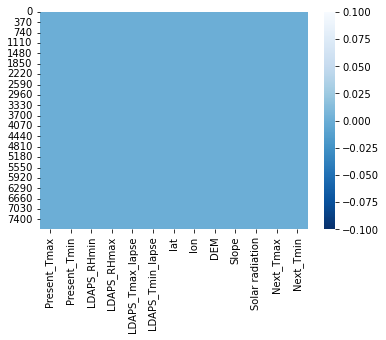

In [178]:
sns.heatmap(df.isnull(),cmap='Blues_r')

# Correlation Matrix

In [179]:
df.corr()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
Present_Tmax,1.000000,0.618769,-0.205341,-0.300261,0.570287,0.624229,-0.052659,0.008990,-0.187138,-0.105884,-0.025401,0.610256,0.622700
Present_Tmin,0.618769,1.000000,0.121800,-0.012659,0.464420,0.764239,-0.078547,-0.043509,-0.250299,-0.146460,0.053638,0.471723,0.796657
LDAPS_RHmin,-0.205341,0.121800,1.000000,0.578770,-0.564575,0.089346,0.087093,-0.076232,0.102108,0.123736,0.244643,-0.439171,0.094061
LDAPS_RHmax,-0.300261,-0.012659,0.578770,1.000000,-0.373274,-0.113914,0.195761,0.025662,0.177134,0.219557,0.148259,-0.281282,-0.070193
LDAPS_Tmax_lapse,0.570287,0.464420,-0.564575,-0.373274,1.000000,0.654013,-0.042093,0.090665,-0.178895,-0.162332,0.047820,0.827473,0.587066
LDAPS_Tmin_lapse,0.624229,0.764239,0.089346,-0.113914,0.654013,1.000000,-0.096252,-0.026700,-0.195445,-0.185839,0.159445,0.588224,0.881074
lat,-0.052659,-0.078547,0.087093,0.195761,-0.042093,-0.096252,1.000000,0.289029,0.033165,0.074763,0.038513,-0.053557,-0.083577
lon,0.008990,-0.043509,-0.076232,0.025662,0.090665,-0.026700,0.289029,1.000000,0.007587,0.038070,0.002182,0.003076,-0.046580
DEM,-0.187138,-0.250299,0.102108,0.177134,-0.178895,-0.195445,0.033165,0.007587,1.000000,0.783576,0.056224,-0.172614,-0.246977
Slope,-0.105884,-0.146460,0.123736,0.219557,-0.162332,-0.185839,0.074763,0.038070,0.783576,1.000000,0.028199,-0.102812,-0.146963


<AxesSubplot:>

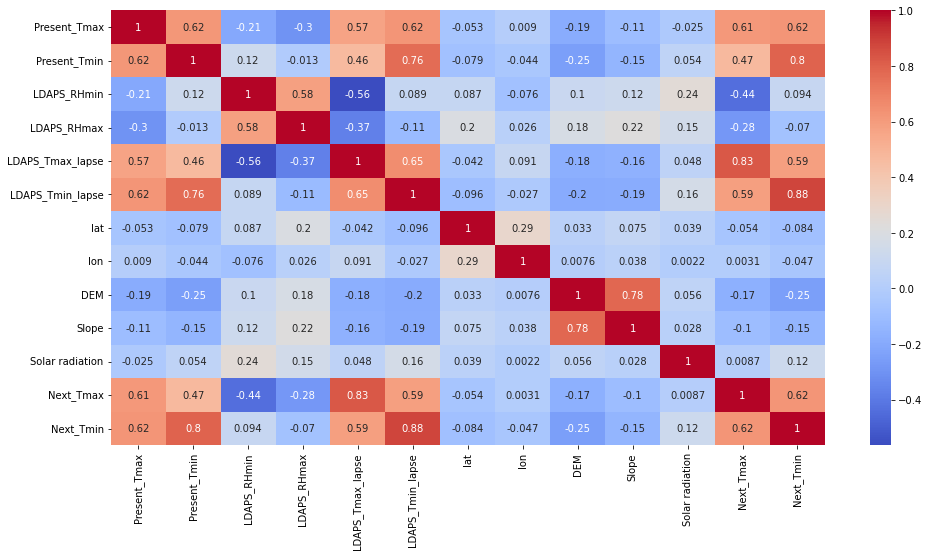

In [180]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Splitting the dataset into the training set and test set

In [181]:
X = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y = df['Next_Tmax']

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [184]:
X_train.shape, X_test.shape

((6201, 11), (1551, 11))

# Model Training

In this dataset we have both classification and regresion problem are present

# Linear Regression

In [185]:
from sklearn.linear_model import LinearRegression

In [186]:
lr = LinearRegression()

In [187]:
lr.fit(X_train,y_train)

LinearRegression()

In [188]:
y_pred1 = lr.predict(X_test)

# RandomForestRegressor

In [189]:
from sklearn.ensemble import RandomForestRegressor

In [190]:
rf = RandomForestRegressor()

In [191]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [192]:
y_pred2 = rf.predict(X_test)

# Gradient Boosting Regressor

In [193]:
from sklearn.ensemble import GradientBoostingRegressor

In [194]:
gr = GradientBoostingRegressor()

In [195]:
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [196]:
y_pred3 = gr.predict(X_test)

In [197]:
df1 = pd.DataFrame({"Actual":y_test,"LR":y_pred1,'RF':y_pred2,'GR':y_pred3})

In [198]:
df1

,Actual,LR,RF,GR
6867,29.1,31.234289,31.617,32.445643
5157,32.0,33.051221,33.043,32.879258
6851,28.5,30.938819,31.132,30.901922
4553,28.5,29.119623,29.125,29.423886
727,30.0,32.681369,31.217,31.591377
...,...,...,...,...
6858,30.1,30.941991,31.009,31.645880
4424,30.8,31.500169,31.012,31.151478
7320,26.8,27.280990,26.763,27.043646
5432,31.3,31.380048,32.451,32.624014


# Compare Performance Visually

to find best model

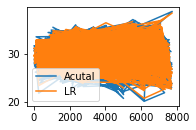

In [199]:
plt.subplot(221)
plt.plot(df1['Actual'],label='Acutal')
plt.plot(df1['LR'],label='LR')
plt.legend()

it is difficult to differentiate both the value acutal value and predicted value.

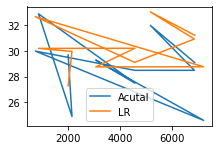

In [200]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[:11],label='Acutal')
plt.plot(df1['LR'].iloc[:11],label='LR')
plt.legend()
plt.tight_layout()

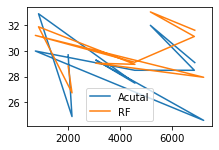

In [201]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[:11],label='Acutal')
plt.plot(df1['RF'].iloc[:11],label='RF')
plt.legend()
plt.tight_layout()

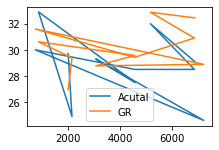

In [202]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[:11],label='Acutal')
plt.plot(df1['GR'].iloc[:11],label='GR')
plt.legend()
plt.tight_layout()

I want to see this all actual value and predicted value for all model in single output.

# Evaluating the algorithm

we are going to evaluate our models or called as a algorithm using r2.

R2 value is used to measure the goodness of fit greater the value of r2 better the regression model

In [203]:
from sklearn import metrics

In [204]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)

In [205]:
print(score1,score2,score3)

0.7263897731629414 0.8298895941982741 0.7719933038250272


In [206]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)

In [207]:
print(s1,s2,s3)

1.2648458386285293 0.9499464861379755 1.1205361479801272


here s2 value is lesser then all another value so model 2 is the best model

# Predict Next_Tmax for New Customer

In [208]:
data = {'Present_Tmax':27.3,
       'Present_Tmin':23.2,
       'LDAPS_RHmin':58.334232,
       'LDAPS_RHmax':91.232323,
       'LDAPS_Tmax_lapse':28.032323,
       'LDAPS_Tmin_lapse':23.434343,
       'lat':44.3434,
       'lon':123.434,
       'DEM':211.3232,
       'Slope':7674.323222,
       'Next_Tmin':2.32}

In [209]:
df1 = pd.DataFrame(data,index=[0])
df1

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,lat,lon,DEM,Slope,Next_Tmin
0,27.3,23.2,58.334232,91.232323,28.032323,23.434343,44.3434,123.434,211.3232,7674.323222,2.32


i am using model 2 because that model is good

In [210]:
new_pred = gr.predict(df1)
print(new_pred)

[28.77579322]


This is Next_Tmax of new data

In [211]:
X1 = df.drop(['Next_Tmax','Next_Tmin'],axis=1)
y1 = df['Next_Tmin']

In [212]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=2)

In [213]:
X1_train.shape, X1_test.shape

((6201, 11), (1551, 11))

Linear Regression

In [108]:
lr = LinearRegression()

In [214]:
lr.fit(X1_train,y1_train)

LinearRegression()

In [215]:
y_predi1 = lr.predict(X1_test)

RandomForestRegressor

In [111]:
rf = RandomForestRegressor()

In [216]:
rf.fit(X1_train,y1_train)

RandomForestRegressor()

In [217]:
y_predi2 = rf.predict(X1_test)

Gradient Boosting Regressor

In [218]:
gr = GradientBoostingRegressor()

In [219]:
gr.fit(X1_train,y1_train)

GradientBoostingRegressor()

In [220]:
y_predi3 = gr.predict(X1_test)

In [221]:
df2 = pd.DataFrame({"Actual":y_test,"LR":y_pred1,'RF':y_pred2,'GR':y_pred3})
df2

,Actual,LR,RF,GR
6867,29.1,31.234289,31.617,32.445643
5157,32.0,33.051221,33.043,32.879258
6851,28.5,30.938819,31.132,30.901922
4553,28.5,29.119623,29.125,29.423886
727,30.0,32.681369,31.217,31.591377
...,...,...,...,...
6858,30.1,30.941991,31.009,31.645880
4424,30.8,31.500169,31.012,31.151478
7320,26.8,27.280990,26.763,27.043646
5432,31.3,31.380048,32.451,32.624014


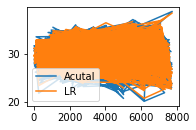

In [222]:
plt.subplot(221)
plt.plot(df2['Actual'],label='Acutal')
plt.plot(df2['LR'],label='LR')
plt.legend()

It is difficult to differentiate both the value acutal value and predicted value.

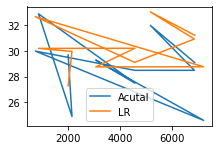

In [223]:
plt.subplot(221)
plt.plot(df2['Actual'].iloc[:11],label='Acutal')
plt.plot(df2['LR'].iloc[:11],label='LR')
plt.legend()
plt.tight_layout()

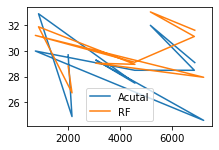

In [224]:
plt.subplot(221)
plt.plot(df2['Actual'].iloc[:11],label='Acutal')
plt.plot(df2['RF'].iloc[:11],label='RF')
plt.legend()
plt.tight_layout()

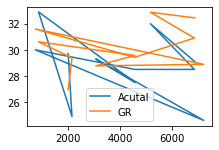

In [225]:
plt.subplot(221)
plt.plot(df2['Actual'].iloc[:11],label='Acutal')
plt.plot(df2['GR'].iloc[:11],label='GR')
plt.legend()
plt.tight_layout()

Evaluating the algorithm

In [226]:
score1 = metrics.r2_score(y1_test,y_predi1)
score2 = metrics.r2_score(y1_test,y_predi2)
score3 = metrics.r2_score(y1_test,y_predi3)

In [227]:
print(score1,score2,score3)

0.824121139734499 0.8751415454259972 0.8621838109331433


In [228]:
s1 = metrics.mean_absolute_error(y1_test,y_predi1)
s2 = metrics.mean_absolute_error(y1_test,y_predi2)
s3 = metrics.mean_absolute_error(y1_test,y_predi3)

In [229]:
print(s1,s2,s3)

0.8158734207912572 0.6638781431334618 0.707192422902815


here s2 value is lesser then all another value so model 2 is the best model

# Predict Next_Tmin for New Customer

In [230]:
data1 = {'Present_Tmax':27.3,
       'Present_Tmin':23.2,
       'LDAPS_RHmin':58.334232,
       'LDAPS_RHmax':91.232323,
       'LDAPS_Tmax_lapse':28.032323,
       'LDAPS_Tmin_lapse':23.434343,
       'lat':44.3434,
       'lon':123.434,
       'DEM':211.3232,
       'Slope':7674.323222,
       'Next_Tmax':2.32}

In [231]:
df2 = pd.DataFrame(data1,index=[0])
df2

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,lat,lon,DEM,Slope,Next_Tmax
0,27.3,23.2,58.334232,91.232323,28.032323,23.434343,44.3434,123.434,211.3232,7674.323222,2.32


In [242]:
new_pred = gr.predict(df2)
print(new_pred)

[22.65884585]


# Save Model using joblib

In [233]:
rf = RandomForestRegressor()

In [234]:
rf.fit(X,y)

RandomForestRegressor()

In [235]:
import joblib

In [236]:
joblib.dump(rf,'Temperature Forecast Tmin')

['Temperature Forecast Tmin']

In [237]:
joblib.dump(rf,'Temperature Forecast Tmax')

['Temperature Forecast Tmax']

In [238]:
model = joblib.load('Temperature Forecast Tmin')

In [239]:
model1 = joblib.load('Temperature Forecast Tmax')

In [250]:
# Temperature Minimum Forecast 
new_pred = gr.predict(df2)
print(new_pred)

[22.65884585]


In [251]:
# Temperature Maximum Forecast
model1.predict(df1)

array([29.027])